### Importing Important Libraries.

In [17]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [18]:
train_data_path='D://Hitesh Data Scientist//Computer Vision//OpenCV//Helmet Detection//Dataset//train'
validation_data_path='D://Hitesh Data Scientist//Computer Vision//OpenCV//Helmet Detection//Dataset//validation'

### show augmented images

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Applying Image Data Agumentation.

In [20]:
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                                     target_size=(200, 200), # all images will be resized to 200x200
                                                     batch_size=128,
                                                     class_mode='binary')  

Found 2216 images belonging to 2 classes.


In [21]:
# Showing the Images.
training_data.class_indices

{'person_with helmet': 0, 'person_without_helmet': 1}

In [22]:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size=(200,200),
                                               batch_size=128,
                                               class_mode='binary')

Found 1068 images belonging to 2 classes.


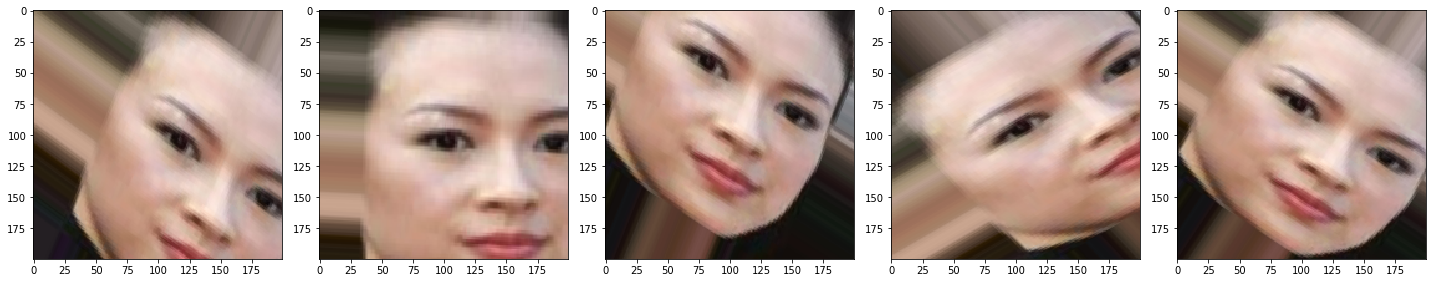

In [23]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

### Performing Convolution Operation.

In [24]:
## Importing Important Libraries.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
### creating the object of Sequential models.
model=Sequential()

## 1st Convolution Layer.
model.add(Conv2D(filters=32,kernel_size=3,input_shape=[200,200,3]))
BatchNormalization()
## Adding 1st Maxpooling Layers.
model.add(MaxPooling2D(pool_size=(4,4)))

## 2nd Convolution Layer.
model.add(Conv2D(filters=64,kernel_size=4))
BatchNormalization()
## Adding 2nd Maxpooling Layers.
model.add(MaxPooling2D(pool_size=(3,3)))

## 3rd Convolution Layer.
model.add(Conv2D(filters=128,kernel_size=3))
BatchNormalization()
## Adding 3rd Maxpooling Layers.
model.add(MaxPooling2D(pool_size=(2,2)))

## 4th Convolution Layer.
model.add(Conv2D(filters=256,kernel_size=3))
BatchNormalization()
## Adding 4th Maxpooling Layers.
model.add(MaxPooling2D(pool_size=(2,2)))

## Adding DropOut Layers.
model.add(Dropout(0.5))

## Creating the Flattening Layers.
model.add(Flatten())

### Creating the Neural Networks.
## Adding 1st COnvolution layers.
model.add(Dense(units=128,activation='relu'))
BatchNormalization()
## Adding DropOut Layers.
model.add(Dropout(0.1))

## Adding 2nd COnvolution layers.
model.add(Dense(units=256,activation='relu'))
BatchNormalization()
## Adding DropOut Layers.
model.add(Dropout(0.25))

## Adding Output Layers.
model.add(Dense(units=2,activation='softmax'))


In [26]:
## Compiling the model.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Training Model.

In [27]:
## Fitting the model.
face_model=model.fit_generator(training_data,
                               epochs=50,
                               verbose=1,
                               validation_data=valid_data)

Epoch 1/50
18/18 [==============================] - 106s 6s/step - loss: 0.5530 - accuracy: 0.7116 - val_loss: 0.2212 - val_accuracy: 0.9382
Epoch 2/50
18/18 [==============================] - 84s 5s/step - loss: 0.3727 - accuracy: 0.8443 - val_loss: 0.1446 - val_accuracy: 0.9569
Epoch 3/50
18/18 [==============================] - 84s 5s/step - loss: 0.2916 - accuracy: 0.8831 - val_loss: 0.1064 - val_accuracy: 0.9485
Epoch 4/50
18/18 [==============================] - 83s 5s/step - loss: 0.2457 - accuracy: 0.9030 - val_loss: 0.0903 - val_accuracy: 0.9663
Epoch 5/50
18/18 [==============================] - 79s 4s/step - loss: 0.1988 - accuracy: 0.9215 - val_loss: 0.1067 - val_accuracy: 0.9569
Epoch 6/50
18/18 [==============================] - 80s 4s/step - loss: 0.2237 - accuracy: 0.9048 - val_loss: 0.0770 - val_accuracy: 0.9747
Epoch 7/50
18/18 [==============================] - 85s 5s/step - loss: 0.1868 - accuracy: 0.9310 - val_loss: 0.0536 - val_accuracy: 0.9803
Epoch 8/50
18/18 [=

In [ ]:
model.save('D://Hitesh Data Scientist//Computer Vision//OpenCV\Helmet Detection//face_model.h5')